# Visualización con Seaborn

Matplotlib ha demostrado ser una herramienta de visualización increíblemente útil y popular, 
pero incluso los usuarios entusiastas admitirán que a menudo deja mucho que desear. Hay varias quejas válidas sobre Matplotlib que a menudo surgen:

Antes de la versión 2.0, los valores predeterminados de Matplotlib no son exactamente las mejores opciones. 
Se basó en MATLAB alrededor de 1999, y esto a menudo se nota.

La API de Matplotlib es de nivel relativamente bajo. Es posible realizar una visualización estadística sofisticada, 
pero a menudo requiere mucho código repetitivo.
Matplotlib fue anterior a Pandas en más de una década y, por lo tanto, no está diseñado para su uso con Pandas DataFrames. 
Para visualizar datos de un Pandas DataFrame, debe extraer cada Serie y, a menudo, concatenarlas juntas en el formato correcto. 
Sería mejor tener una biblioteca de trazado que pueda usar inteligentemente las etiquetas de DataFrame en un trazado.

In [121]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [122]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

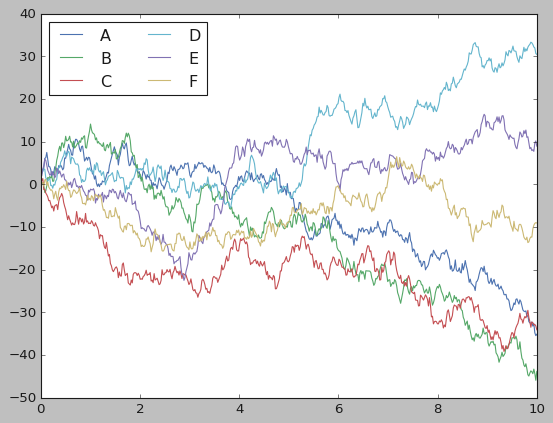

In [123]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Una respuesta a estos problemas es Seaborn. Seaborn proporciona una API sobre Matplotlib que ofrece opciones sensatas para el estilo de trazado y los valores predeterminados de color, define funciones simples de alto nivel para tipos de trazado estadísticos comunes, y se integra con la funcionalidad proporcionada por Pandas DataFrames.

In [124]:
import seaborn as sns
sns.set()

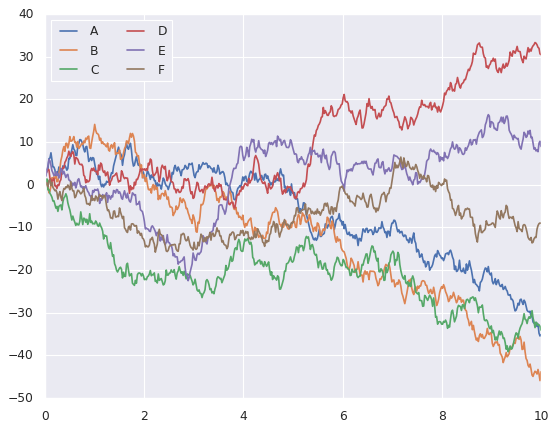

In [125]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

La idea principal de Seaborn es que proporciona comandos de alto nivel para crear una variedad de tipos de gráficos útiles para la exploración de datos estadísticos, e incluso algunos ajustes de modelos estadísticos.

Echemos un vistazo a algunos de los conjuntos de datos y tipos de gráficos disponibles en Seaborn. Tenga en cuenta que todo lo siguiente podría hacerse utilizando los comandos de Matplotlib sin procesar (esto es, de hecho, lo que hace Seaborn bajo el capó), pero la API de Seaborn es mucho más conveniente.

In [126]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
data.head()

x         y
0 -1.237847 -3.138333
1  4.421970  1.559632
2  0.677920  1.688506
3  5.271232  0.464313
4  3.205078  1.600404

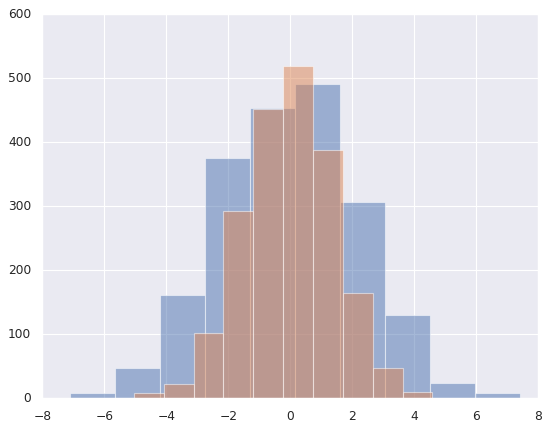

In [127]:
for col in 'xy':
    plt.hist(data[col], alpha=0.5)

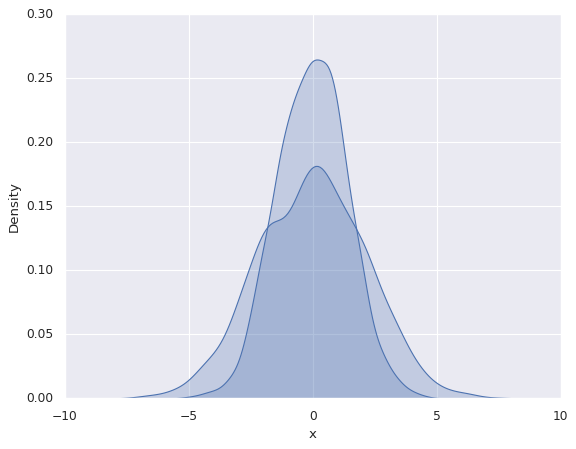

In [128]:
for col in 'xy':
    sns.kdeplot(data[col], fill=True)

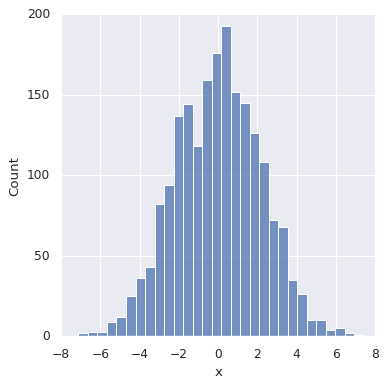

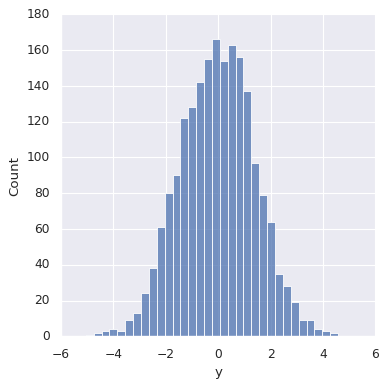

In [129]:
sns.displot(data['x'])
sns.displot(data['y']);

In [130]:
iris = sns.load_dataset("iris")

In [131]:
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

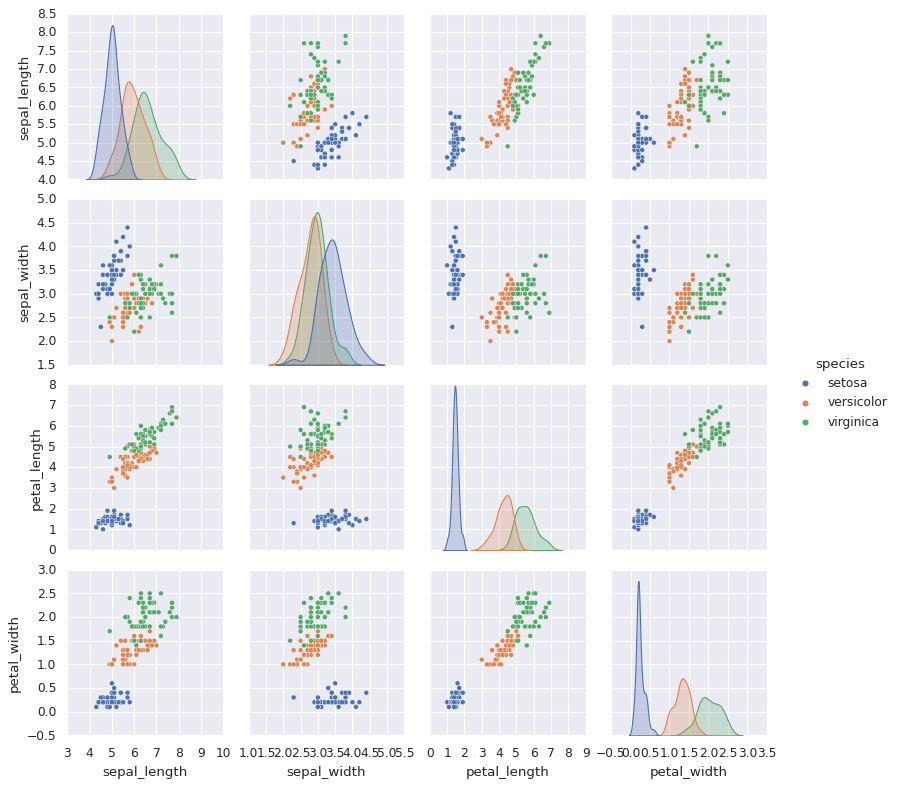

In [132]:
sns.pairplot(iris, hue='species', height=2.5);

# Histogramas

A veces, la mejor manera de ver los datos es a través de histogramas de subconjuntos. FacetGrid de Seaborn lo hace extremadamente simple. Echaremos un vistazo a algunos datos que muestran la cantidad que recibe el personal del restaurante en consejos basados en diversos datos del indicador:

In [133]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

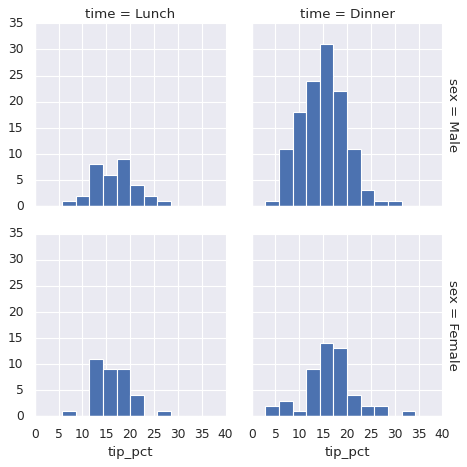

In [134]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15)); # bines. 

# Gráficos de factores
Los gráficos de factores también pueden ser útiles para este tipo de visualización. Esto le permite ver la distribución de un parámetro dentro de los contenedores definidos por cualquier otro parámetro

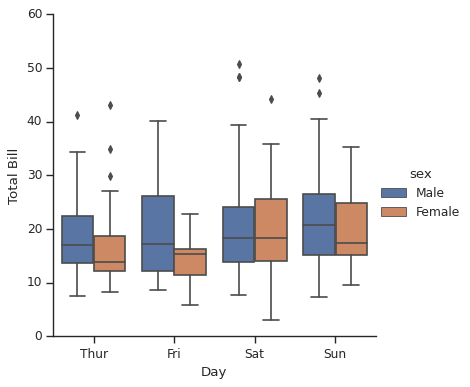

In [135]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

# Distribuciones conjuntas
Similar al diagrama de pares que vimos anteriormente, podemos usar sns.jointplot para mostrar la distribución conjunta entre diferentes conjuntos de datos, junto con las distribuciones marginales asociadas:

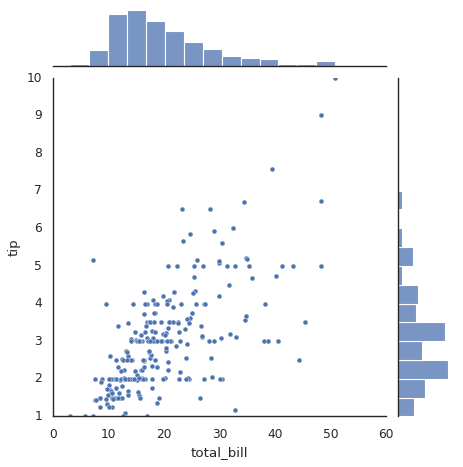

In [142]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='scatter')

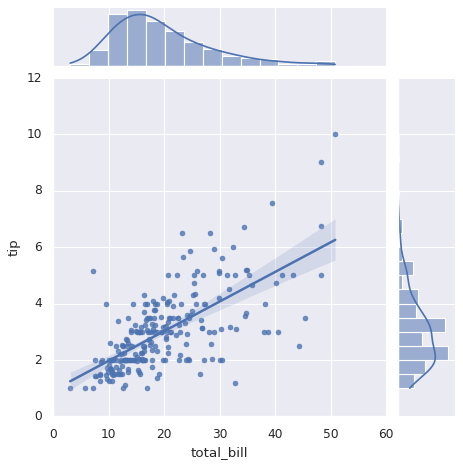

In [137]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

In [138]:
planets = sns.load_dataset('planets')
planets.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

# Gráficos de bar
Las series de tiempo se pueden trazar usando sns.factorplot. En el siguiente ejemplo, utilizaremos los datos de Planetas que vimos por primera vez en Agregación y agrupación:

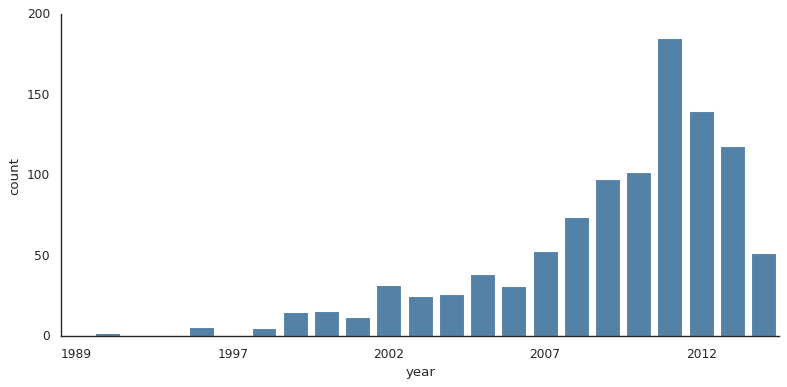

In [139]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2, kind="count", color='steelblue')
    g.set_xticklabels(step=5)

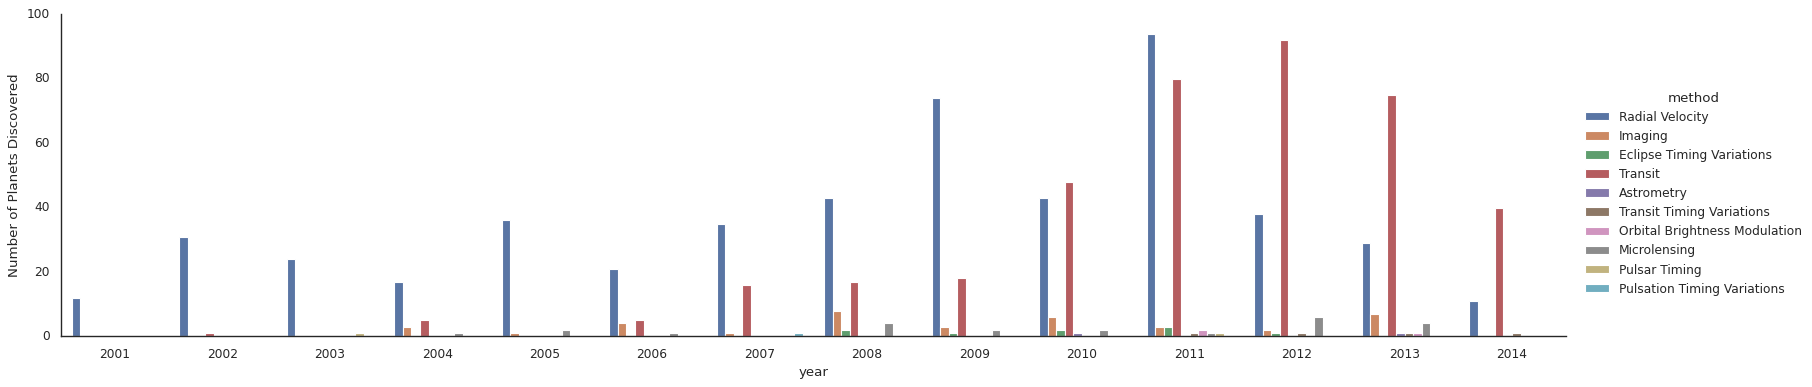

In [140]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count', hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')